# Домашнее задание 1

__Предобработка изображений для использования в нейросети__

## Импорт библиотек

In [0]:
import os
import glob
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt

## Загрузка данных

- Пусть к данным

In [0]:
GLOBAL_PATH = '/content/drive/My Drive/Colab Notebooks/hw/data/'

### Функции загрузки данных

- Определим функции для определения всех папок с изображениями и функцию загрузки и предобработки

In [0]:
def map_chars(path):
  '''Возвращает все названия папок в дирректории path
    
    Parameters:
      path (string): должен заканчиваться "/"'''
  map_characters = {}
  i = 0
  for fold in glob.glob(path + '*', recursive=False):
    map_characters[i] = fold.split('/')[-1]
    i += 1
  return(map_characters)

In [0]:
def load_train_set(path, map_characters=None, size=(64, 64), 
                   n_samples=None, verbose=1, print_step = 50):
  '''Загружает датасет из картинок

        Классы должны быть разбиты по папкам
  
  Parameters:
     path (string): директория с папками, в которых картинки класса 
                                            должен заканчиваться "/"

    map_characters (dict): словарь названий классов и их лейблов.
            Функция будет загружать только классы из этого словаря
            Если None то соберет словарь самостоятельно map_char(path), включив
              все классы (папки)
    
    size (tuple(n,m)): Скалирует фото к размеру [m, n]
    
    n_samples (int): Максимальное кол-во загружаемых фото в каждом классе
    
    verbose (0, 1, 2): 0 - не выводить логи
                       1 - выводить логи по классам и итерациям с частотой print_step
                       2 - выводит логи только по классам
    print_step (int): Частота вывода логов по итерациям (Только если verbose=1)
  '''

  if (map_characters == None):
    map_characters = map_chars(path)

  pics, labels = [], []
  time_start = time.time()
  
  for (i, char) in map_characters.items():
    if(verbose > 0):
      print('Loading {}, time {}'.format(char, time.time() - time_start))
    for j, image_path in enumerate(glob.glob(path + char + '/*.*')):
      try:
        temp = cv2.imread(image_path)
        temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
        temp = cv2.resize(temp,(size[0],size[1])).astype('float32') / 255.
        if ((verbose == 1) and (j % print_step == 0)):
          print('\tStep {}:, time {}'.format(j, time.time() - time_start))
        if (j == n_samples):
          break
        pics.append(temp)
        labels.append(i)
      except:
        print('\tStep {}: Error'.format(j))
        continue
  print('Done. Total time: {}'.format(time.time() - time_start))
  print('Done. Total imgs: {}'.format(len(pics)))
  return(np.array(pics), np.array(labels))

### Поиск всех классов

In [0]:
all_characters = map_chars(GLOBAL_PATH + 'simpsons_dataset/')
all_characters

{0: 'bart_simpson',
 1: 'carl_carlson',
 2: 'barney_gumble',
 3: 'agnes_skinner',
 4: 'apu_nahasapeemapetilon',
 5: 'abraham_grampa_simpson',
 6: 'comic_book_guy',
 7: 'edna_krabappel',
 8: 'fat_tony',
 9: 'chief_wiggum',
 10: 'disco_stu',
 11: 'cletus_spuckler',
 12: 'charles_montgomery_burns',
 13: 'groundskeeper_willie',
 14: 'gil',
 15: 'homer_simpson',
 16: 'lionel_hutz',
 17: 'kent_brockman',
 18: 'krusty_the_clown',
 19: 'marge_simpson',
 20: 'lenny_leonard',
 21: 'maggie_simpson',
 22: 'lisa_simpson',
 23: 'mayor_quimby',
 24: 'milhouse_van_houten',
 25: 'martin_prince',
 26: 'otto_mann',
 27: 'nelson_muntz',
 28: 'principal_skinner',
 29: 'moe_szyslak',
 30: 'patty_bouvier',
 31: 'miss_hoover',
 32: 'ned_flanders',
 33: 'rainier_wolfcastle',
 34: 'ralph_wiggum',
 35: 'professor_john_frink',
 36: 'simpsons_dataset',
 37: 'waylon_smithers',
 38: 'snake_jailbird',
 39: 'sideshow_bob',
 40: 'troy_mcclure',
 41: 'sideshow_mel',
 42: 'selma_bouvier'}

### Загрузка и предобработка

- Преобразуем фотки homer_simpson в numpy файл

In [0]:
homer = {0:'homer_simpson'}

X, y = load_train_set(path=(GLOBAL_PATH + 'simpsons_dataset/'), 
                      map_characters=homer,
                      print_step=50)
np.save(GLOBAL_PATH + 'np_images/train/homer.npy', X)

Loading homer_simpson, time 1.9073486328125e-06
	Step 0:, time 0.04068112373352051
	Step 50:, time 0.3253765106201172
	Step 100:, time 0.6158514022827148
	Step 150:, time 23.849838495254517
	Step 200:, time 48.730642795562744
	Step 250:, time 78.62324976921082
	Step 300:, time 104.93685960769653
	Step 350:, time 132.96305966377258
	Step 400:, time 160.3849515914917
	Step 450:, time 187.8231074810028
	Step 500:, time 214.53447556495667
	Step 550:, time 243.33492851257324
	Step 600:, time 270.7753391265869
	Step 650:, time 297.3757882118225
	Step 700:, time 326.32093572616577
	Step 750:, time 348.4341697692871
	Step 800:, time 373.7074978351593
	Step 850:, time 398.1042878627777
	Step 900:, time 421.8333089351654
	Step 950:, time 447.4488000869751
	Step 1000:, time 474.9938771724701
	Step 1050:, time 502.5304226875305
	Step 1100:, time 529.2386565208435
	Step 1150:, time 554.0429718494415
	Step 1200:, time 579.8989131450653
	Step 1250:, time 609.2399754524231
	Step 1300:, time 634.745385

- Проверим корректность сохранения файла numpy

In [0]:
%time X_homer = np.load(GLOBAL_PATH + 'np_images/train/homer.npy')

print(X_homer.shape)

CPU times: user 0 ns, sys: 91 ms, total: 91 ms
Wall time: 202 ms
(2246, 64, 64, 3)


- Преобразуем остальные классы, которые будем использовать в нейронной сети

In [0]:
char_list1 = ['bart_simpson',  'abraham_grampa_simpson', 'fat_tony', 'krusty_the_clown']
char_list2 = ['marge_simpson', 'maggie_simpson', 'lisa_simpson']

In [0]:
for character in char_list1:
  X_temp, _ = load_train_set(path=(GLOBAL_PATH + 'simpsons_dataset/'), 
                      map_characters={0:character},
                      print_step=500)
  np.save(GLOBAL_PATH + 'np_images/train/'+ character +'.npy', X_temp)

Loading bart_simpson, time 1.1920928955078125e-06
	Step 0:, time 0.6195552349090576
	Step 500:, time 227.0244369506836
	Step 1000:, time 532.0201332569122
Done
Loading abraham_grampa_simpson, time 7.3909759521484375e-06
	Step 0:, time 0.8280539512634277
	Step 500:, time 377.7815809249878
Done
Loading fat_tony, time 6.198883056640625e-06
	Step 0:, time 0.6242237091064453
Done
Loading krusty_the_clown, time 7.152557373046875e-06
	Step 0:, time 0.6732511520385742
	Step 500:, time 275.1785538196564
	Step 1000:, time 542.9640283584595
Done


In [0]:
for character in char_list2:
  X_temp, _ = load_train_set(path=(GLOBAL_PATH + 'simpsons_dataset/'), 
                      map_characters={0:character},
                      print_step=500)
  np.save(GLOBAL_PATH + 'np_images/'+ character +'.npy', X_temp)

Loading marge_simpson, time 2.384185791015625e-06
	Step 0:, time 0.5441360473632812
Done. Total time: 49.617841720581055
Done. Total imgs: 96
Loading maggie_simpson, time 6.198883056640625e-06
	Step 0:, time 0.5416648387908936
Done. Total time: 76.66577816009521
Done. Total imgs: 128
Loading lisa_simpson, time 5.9604644775390625e-06
	Step 0:, time 0.6157095432281494
	Step 500:, time 274.606374502182
	Step 1000:, time 554.7784543037415
Done. Total time: 743.8275654315948
Done. Total imgs: 1354
Loading moe_szyslak, time 1.33514404296875e-05
Done. Total time: 0.00179290771484375
Done. Total imgs: 0


## Загрузка предобработанного датасета



### Функция загрузки numpy файлов

In [0]:
def load_data_from_np(folder_path, classes = None, verbose = 1):
  '''
  Загрузит множество npy файлов и объединит. (X, y)

  Parameters:
    
    folder_path (string): Путь до директории с файлами (Заканчивается именем папки)

    classes (list[string]): Названия классов, которые необходимо загружать
          Если None то загрузит все

    verbose (int): Если 1 то выводит логи. 0 - иначе
  '''
  X, y = None, []
  start_time = time.time()

  for file_path in glob.glob(folder_path + '/*.*'):
    class_name = file_path.split('/')[-1].split('.')[0]
    if ((classes == None) or (class_name in classes)):
      if (X is None):
        X = np.load(file_path)
        y = np.array([class_name]*X.shape[0])
      else:
        X_temp = np.load(file_path)
        X = np.concatenate((X, X_temp))
        y = np.concatenate((y, np.array([class_name]*X_temp.shape[0])))
      
      if (verbose == 1):
        #print('{} loaded. Total time {}'.format(class_name, time.time() - start_time))
        print('%-25s Total time: %-4f'%(class_name, time.time() - start_time))
  print('\nDone')
  return (X, np.array(y))

### Загрузка

- Загрузим датасет и подготовим к использованию в нейросети

In [0]:
X, y = load_data_from_np(GLOBAL_PATH + 'np_images/train')

homer                     Total time: 0.298590
bart_simpson              Total time: 0.535692
abraham_grampa_simpson    Total time: 0.762168
fat_tony                  Total time: 0.942315
krusty_the_clown          Total time: 1.424898
marge_simpson             Total time: 1.515582
maggie_simpson            Total time: 1.613361
lisa_simpson              Total time: 1.832977

Done


### Предобработка

- Бинаризуем целевую переменную для использования в нейросети

In [0]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
y = ohe.fit_transform(y.reshape(-1, 1))

In [0]:
map_characters = {i : ohe.categories_[0][i] for i in range(7) }

- Разобьем выборку на тренировочный и валидационный

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

- Проверим что каждый в оба сета попали все классы

In [0]:
print(np.unique(ohe.inverse_transform(y_train), return_counts=True))
print(np.unique(ohe.inverse_transform(y_test), return_counts=True))

(array(['abraham_grampa_simpson', 'bart_simpson', 'fat_tony', 'homer',
       'krusty_the_clown', 'lisa_simpson', 'maggie_simpson',
       'marge_simpson'], dtype='<U22'), array([ 841, 1212,   24, 2022, 1066, 1211,  117,   87]))
(array(['abraham_grampa_simpson', 'bart_simpson', 'fat_tony', 'homer',
       'krusty_the_clown', 'lisa_simpson', 'maggie_simpson',
       'marge_simpson'], dtype='<U22'), array([ 72, 130,   3, 224, 140, 143,  11,   9]))


## Визуализация датасета

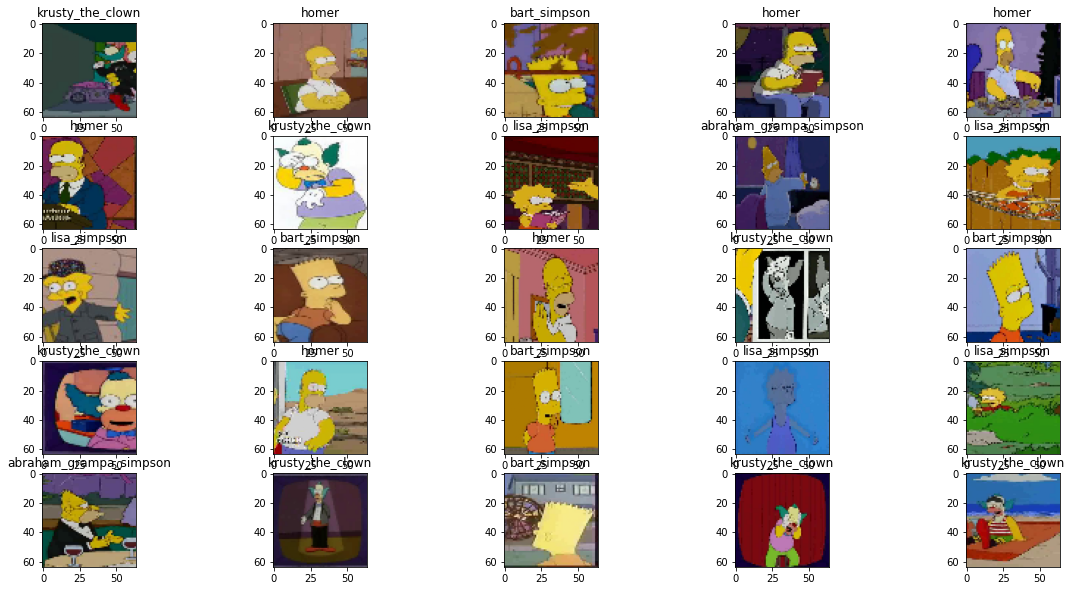

In [0]:
plt.figure(figsize=(20,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    n = np.random.choice(X.shape[0])
    
    plt.imshow(X[n])
    #plt.title(ohe.inverse_transform(y[n].reshape(1, -1))[0][0])
    plt.title(map_characters[np.argmax(y[n])])

## Загрузка и предобработка тестового датасета

In [0]:
char_list1 = ['bart_simpson',  'abraham_grampa_simpson', 'fat_tony', 'krusty_the_clown']
char_list2 = ['marge_simpson', 'maggie_simpson', 'lisa_simpson', 'homer']

In [0]:
for character in char_list1:
  X_temp, _ = load_train_set(path=(GLOBAL_PATH + 'simpsons_test_set_8_classes/'), 
                      map_characters={0:character},
                      print_step=50)
  np.save(GLOBAL_PATH + 'np_images/test/'+ character +'.npy', X_temp)

Loading bart_simpson, time 1.6689300537109375e-06
	Step 0:, time 0.024261474609375
	Step 30: Error
	Step 50:, time 0.7824780941009521
Done. Total time: 1.1264638900756836
Done. Total imgs: 73
Loading abraham_grampa_simpson, time 7.867813110351562e-06
	Step 0:, time 0.3275587558746338
Done. Total time: 17.284514665603638
Done. Total imgs: 26
Loading fat_tony, time 6.4373016357421875e-06
	Step 0:, time 0.5780766010284424
	Step 9: Error
Done. Total time: 29.63377356529236
Done. Total imgs: 38
Loading krusty_the_clown, time 8.821487426757812e-06
	Step 0:, time 0.5575206279754639
Done. Total time: 24.10788583755493
Done. Total imgs: 50


In [0]:
for character in char_list2:
  X_temp, _ = load_train_set(path=(GLOBAL_PATH + 'simpsons_test_set_8_classes/'), 
                      map_characters={0:character},
                      print_step=50)
  np.save(GLOBAL_PATH + 'np_images/test/'+ character +'.npy', X_temp)
  print('\n')

Loading marge_simpson, time 1.1920928955078125e-06
	Step 0:, time 0.5323896408081055
	Step 50:, time 25.137173414230347
Done. Total time: 29.39022207260132
Done. Total imgs: 58


Loading maggie_simpson, time 4.0531158447265625e-06
	Step 0:, time 0.6556680202484131
	Step 9: Error
	Step 50:, time 34.729087114334106
Done. Total time: 42.80849313735962
Done. Total imgs: 64


Loading lisa_simpson, time 5.9604644775390625e-06
	Step 0:, time 0.5091695785522461
Done. Total time: 24.924039602279663
Done. Total imgs: 50


Loading homer, time 6.4373016357421875e-06
	Step 0:, time 0.5332212448120117
Done. Total time: 26.383569955825806
Done. Total imgs: 50


